# 1. Importing data and exploratory data analysis

Imported files:
1. Hospital Compare - Readmission rates: https://data.medicare.gov/Hospital-Compare/Hospital-Readmissions-Reduction-Program/9n3s-kdb3
2. Hospital Info (including addresses): https://data.medicare.gov/Hospital-Compare/Hospital-General-Information/xubh-q36u
3. CMPS IPPS File w/ Wage Index: https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/Wage-Index-Files-Items/FY2017-Wage-Index-Home-Page.html?DLPage=1&DLEntries=10&DLSort=1&DLSortDir=descending
4. Census Data - median household income by county: <https://data.census.gov/cedsci/table?q=S19&d=ACS 1-Year Estimates Subject Tables&table=S1901&tid=ACSST1Y2017.S1901&lastDisplayedRow=16&hidePreview=true&g=0100000US.050000>
5. American Community Survey - education level by county: https://www.ers.usda.gov/data-products/county-level-data-sets/download-data/

1. Import data
2. Clean data
3. Merge data
4. Final inclusion criteria
5. Exploratory data analysis


### Set up

In [93]:
from __future__ import print_function, division
#Import BeautifulSoup
from bs4 import BeautifulSoup
#Regular expressions compiler
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

import pickle

#import special dictionaries/functions from other programs
from us_state_abbrev import us_state_abbrev

In [94]:
# if needed: pip install requests or conda install requests
import requests

requests.__path__

['/Users/Jocelyn/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

## 1. Import Data

### Import healthdata.gov datasets using API
HRRP API info: https://dev.socrata.com/foundry/data.medicare.gov/9n3s-kdb3 <br>
General Hospital API info: https://dev.socrata.com/foundry/data.medicare.gov/rbry-mqwu

ONLY RUN AS NEEDED AS THERE ARE STRICT THROTTLING LIMITS WITHOUT TOKEN! USE THE PICKLES

In [95]:
#!/usr/bin/env python

# # make sure to install these packages before running:
# # pip install pandas
# # pip install sodapy

# import pandas as pd
# from sodapy import Socrata

# # Unauthenticated client only works with public data sets. Note 'None'
# # in place of application token, and no username or password:
# client = Socrata("data.medicare.gov", None)

# # Example authenticated client (needed for non-public datasets):
# # client = Socrata(data.medicare.gov,
# #                  MyAppToken,
# #                  userame="user@example.com",
# #                  password="AFakePassword")

# # Results returned as JSON from API / converted to Python list of
# # dictionaries by sodapy.
# hrrp = client.get("9n3s-kdb3", limit=20000) #Readmissions scores
# geninfo = client.get("rbry-mqwu", limit=6000) #General hospital information

# # Convert to pandas DataFrame
# hrrp_df = pd.DataFrame.from_records(hrrp)
# geninfo_df = pd.DataFrame.from_records(geninfo)

In [96]:
# #pickle the datasets for later use
# with open('pickles/hrrp.pickle', 'wb') as to_write:
#     pickle.dump(hrrp_df, to_write)

# with open('pickles/geninfo.pickle', 'wb') as to_write:
#     pickle.dump(geninfo_df, to_write)
    
# !ls

### import hospital wage index data

In [97]:
wageindex14 = pd.read_csv("raw data/wage_index_14.txt", delimiter = "\t",header=None,names=['CCN','Case_Mix_Indexes','FY_Wage_Index','Avg_Hourly_Wage_FY2012',
                                                                         'Avg_Hourly_Wage_FY2013','Avg_Hourly_Wage_FY2014','3_Year_Avg_Hourly_Wage'])

wageindex15 = pd.read_csv("raw data/wage_index_15.txt", delimiter = "\t",header=None,names=['CCN','Case_Mix_Indexes','FY_Wage_Index','Avg_Hourly_Wage_FY2013',
                                                                         'Avg_Hourly_Wage_FY2014','Avg_Hourly_Wage_FY2015','3_Year_Avg_Hourly_Wage'])
# wageindex14.info()

In [98]:
wageindex16 = pd.read_csv('raw data/wage_index_16.txt', delimiter = "\t",header=None,names=['CCN','Case_Mix_Indexes','FY_Wage_Index','Avg_Hourly_Wage_FY2014',
                                                                        'Avg_Hourly_Wage_FY2015','Avg_Hourly_Wage_FY2016','3_Year_Avg_Hourly_Wage',
                                                                        'Geographic_CBSA','Reclassified_Redesignated_CBSA','Lugar_NECMA','MGCRB_Reclass',
                                                                        'Hosp_Reclass','Out_Migration_Adj','County_Name','County_Code'])
wageindex17 = pd.read_csv('raw data/wage_index_17.txt', delimiter = "\t",header=None,names=['CCN','Case_Mix_Indexes','FY_Wage_Index','Avg_Hourly_Wage_FY2015',
                                                                        'Avg_Hourly_Wage_FY2016','Avg_Hourly_Wage_FY2017','3_Year_Avg_Hourly_Wage',
                                                                        'Geographic_CBSA','Reclassified_Redesignated_CBSA','Lugar_NECMA','MGCRB_Reclass',
                                                                        'Hosp_Reclass','Out_Migration_Adj','County_Name','County_Code'])
# wageindex16.info()

In [99]:
with open('pickles/wageindex14.pickle', 'wb') as to_write:
    pickle.dump(wageindex14, to_write)
with open('pickles/wageindex15.pickle', 'wb') as to_write:
    pickle.dump(wageindex15, to_write)
with open('pickles/wageindex16.pickle', 'wb') as to_write:
    pickle.dump(wageindex16, to_write)
with open('pickles/wageindex17.pickle', 'wb') as to_write:
    pickle.dump(wageindex17, to_write)

### Import county income data

In [100]:
censusincome14 = pd.read_csv('raw data/census_income_data_14.csv',skiprows=[0])
censusincome15 = pd.read_csv('raw data/census_income_data_15.csv',skiprows=[0])
censusincome16 = pd.read_csv('raw data/census_income_data_16.csv',skiprows=[0])
censusincome17 = pd.read_csv('raw data/census_income_data_17.csv',skiprows=[0])

# censusincome.info()
# censusincome17.head(5)

with open('pickles/censusincome14.pickle', 'wb') as to_write:
    pickle.dump(censusincome14, to_write)
with open('pickles/censusincome15.pickle', 'wb') as to_write:
    pickle.dump(censusincome15, to_write)
with open('pickles/censusincome16.pickle', 'wb') as to_write:
    pickle.dump(censusincome16, to_write)
with open('pickles/censusincome17.pickle', 'wb') as to_write:
    pickle.dump(censusincome17, to_write)

### Import education

In [101]:
education = pd.read_csv('raw data/Education.csv')
# education.head(5)
# education.info()

with open('pickles/education.pickle', 'wb') as to_write:
    pickle.dump(education, to_write)

### Open pickled datasets

#### Hospital

In [102]:
with open('pickles/hrrp.pickle','rb') as read_file:
    hrrp_df = pickle.load(read_file)
    
hrrp_df.head(5)

,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote
0,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_AMI_HRRP,798,1.0072,14.8575,14.7514,119,07/01/2014,06/30/2017,NaN
1,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_CABG_HRRP,290,1.1392,14.0204,12.3077,44,07/01/2014,06/30/2017,NaN
2,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_COPD_HRRP,569,0.9913,18.2153,18.3745,103,07/01/2014,06/30/2017,NaN
3,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HF_HRRP,1061,1.0135,21.5968,21.3101,230,07/01/2014,06/30/2017,NaN
4,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HIP_KNEE_HRRP,335,1.0468,5.0853,4.8582,18,07/01/2014,06/30/2017,NaN


In [103]:
with open('pickles/geninfo.pickle','rb') as read_file:
    geninfo_df = pickle.load(read_file)
    
geninfo_df.head(5)

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,:@computed_region_csmy_5jwy,meets_criteria_for_meaningful_use_of_ehrs,hospital_overall_rating_footnote,mortality_national_comparison_footnote,safety_of_care_national_comparison_footnote,readmission_national_comparison_footnote,patient_experience_national_comparison_footnote,effectiveness_of_care_national_comparison_footnote,timeliness_of_care_national_comparison_footnote,efficient_use_of_medical_imaging_national_comparison_footnote
0,260096,NORTH KANSAS CITY HOSPITAL,2800 CLAY EDWARDS DRIVE,NORTH KANSAS CITY,MO,64116,CLAY,8166912000,Acute Care Hospitals,Government - Local,...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,450775,HCA HOUSTON HEALTHCARE KINGWOOD,22999 US HWY 59,KINGWOOD,TX,77325,HARRIS,2813597500,Acute Care Hospitals,Proprietary,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200008,NORTHERN LIGHT HEALTH,144 STATE STREET,PORTLAND,ME,04101,CUMBERLAND,2078793000,Acute Care Hospitals,Voluntary non-profit - Church,...,49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210018,MEDSTAR MONTGOMERY MEDICAL CENTER,18101 PRINCE PHILIP DRIVE,OLNEY,MD,20832,MONTGOMERY,3017748882,Acute Care Hospitals,Voluntary non-profit - Private,...,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,154056,EVANSVILLE STATE HOSPITAL,3400 LINCOLN AVENUE,EVANSVILLE,IN,47714,VANDERBURGH,8124696800,Psychiatric,Government - State,...,35,NaN,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...,Data are shown only for hospitals that partici...


In [104]:
with open('pickles/wageindex14.pickle','rb') as read_file:
    wageindex14_df = pickle.load(read_file)
    
wageindex14_df.head(5)

,CCN,Case_Mix_Indexes,FY_Wage_Index,Avg_Hourly_Wage_FY2012,Avg_Hourly_Wage_FY2013,Avg_Hourly_Wage_FY2014,3_Year_Avg_Hourly_Wage
0,10001,1.7394,0.8106,27.3711,28.0956,28.4305,27.9695
1,10005,1.3291,0.815,26.3289,27.0526,28.3023,27.2443
2,10006,1.556,0.7436,27.91,27.9206,28.3321,28.0549
3,10007,1.0092,0.7094,23.2296,22.959,22.6684,22.9586
4,10008,0.947,0.7193,26.0069,26.2764,24.0769,25.4392


In [105]:
with open('pickles/wageindex15.pickle','rb') as read_file:
    wageindex15_df = pickle.load(read_file)
    
wageindex15_df.head(5)

,CCN,Case_Mix_Indexes,FY_Wage_Index,Avg_Hourly_Wage_FY2013,Avg_Hourly_Wage_FY2014,Avg_Hourly_Wage_FY2015,3_Year_Avg_Hourly_Wage
0,10001,1.7647,0.7704,28.0956,28.4305,28.4012,28.31
1,10005,1.3589,0.8212,27.0526,28.3023,27.7541,27.7003
2,10006,1.6742,0.7325,27.9206,28.3321,27.9861,28.0827
3,10007,1.0283,0.6874,22.959,22.6684,22.1117,22.5769
4,10008,0.9257,0.6973,26.2764,24.0769,23.713,24.6357


In [106]:
with open('pickles/wageindex16.pickle','rb') as read_file:
    wageindex16_df = pickle.load(read_file)
    
wageindex16_df.head(5)

,CCN,Case_Mix_Indexes,FY_Wage_Index,Avg_Hourly_Wage_FY2014,Avg_Hourly_Wage_FY2015,Avg_Hourly_Wage_FY2016,3_Year_Avg_Hourly_Wage,Geographic_CBSA,Reclassified_Redesignated_CBSA,Lugar_NECMA,MGCRB_Reclass,Hosp_Reclass,Out_Migration_Adj,County_Name,County_Code
0,010001,1.6935,0.6941,28.4305,28.4012,29.1656,28.6629,20020,NaN,NaN,NaN,NaN,NaN,HOUSTON,1340
1,010005,1.3210,0.8274,28.3023,27.7541,28.1275,28.0762,1,26620.0,NaN,Y,NaN,0.0263,MARSHALL,1470
2,010006,1.6217,0.6875,28.3321,27.9861,26.1226,27.4785,22520,NaN,NaN,NaN,NaN,NaN,LAUDERDALE,1380
3,010007,1.0092,0.6875,22.6684,22.1117,23.3987,22.7179,1,NaN,NaN,NaN,NaN,NaN,COVINGTON,1190
4,010008,0.9738,0.6974,24.0769,23.7130,27.7051,25.1787,1,NaN,NaN,NaN,NaN,0.0099,CRENSHAW,1200


In [107]:
with open('pickles/wageindex17.pickle','rb') as read_file:
    wageindex17_df = pickle.load(read_file)
    
wageindex17_df.head(5)

,CCN,Case_Mix_Indexes,FY_Wage_Index,Avg_Hourly_Wage_FY2015,Avg_Hourly_Wage_FY2016,Avg_Hourly_Wage_FY2017,3_Year_Avg_Hourly_Wage,Geographic_CBSA,Reclassified_Redesignated_CBSA,Lugar_NECMA,MGCRB_Reclass,Hosp_Reclass,Out_Migration_Adj,County_Name,County_Code
0,010001,1.6667,0.7666,28.4012,29.1656,29.5127,29.0321,20020,18880.0,NaN,Y,NaN,NaN,HOUSTON,1340.0
1,010005,1.3504,0.8099,27.7541,28.1275,28.4608,28.1724,1,26620.0,NaN,Y,NaN,0.053,MARSHALL,1470.0
2,010006,1.6484,0.6857,27.9861,26.1226,27.5379,27.2113,22520,NaN,NaN,NaN,NaN,NaN,LAUDERDALE,1380.0
3,010007,1.0515,0.6857,22.1117,23.3987,25.2733,23.5141,1,NaN,NaN,NaN,NaN,NaN,COVINGTON,1190.0
4,010008,0.9257,0.6977,23.7130,27.7051,25.2275,25.5438,1,NaN,NaN,NaN,NaN,0.012,CRENSHAW,1200.0


#### Census income data

In [108]:
with open('pickles/censusincome14.pickle','rb') as read_file:
    censusincome14_df = pickle.load(read_file)
    
censusincome14_df.head(5)

,id,Geographic Area Name,Households!!Estimate!!Total,Households!!Margin of Error!!Total,"Households!!Estimate!!Less than $10,000","Households!!Margin of Error!!Less than $10,000","Households!!Estimate!!$10,000 to $14,999","Households!!Margin of Error!!$10,000 to $14,999","Households!!Estimate!!$15,000 to $24,999","Households!!Margin of Error!!$15,000 to $24,999",...,Nonfamily households!!Estimate!!Median income (dollars),Nonfamily households!!Margin of Error!!Median income (dollars),Nonfamily households!!Estimate!!Mean income (dollars),Nonfamily households!!Margin of Error!!Mean income (dollars),Nonfamily households!!Estimate!!PERCENT IMPUTED!!Household income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Household income in the past 12 months,Nonfamily households!!Estimate!!PERCENT IMPUTED!!Family income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Family income in the past 12 months,Nonfamily households!!Estimate!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Nonfamily income in the past 12 months
0,0500000US04025,"Yavapai County, Arizona",90584,2671,6.2,1.3,7.3,1.4,12.4,1.9,...,27972,2656,38286,3263,(X),(X),(X),(X),37.3,(X)
1,0500000US04027,"Yuma County, Arizona",70593,1932,8.8,1.6,6.6,1.5,16.0,2.1,...,24753,2868,39274,5702,(X),(X),(X),(X),34.6,(X)
2,0500000US05007,"Benton County, Arkansas",86232,1851,4.4,1.0,5.2,1.2,9.5,1.4,...,32835,2994,43821,4017,(X),(X),(X),(X),24.7,(X)
3,0500000US05031,"Craighead County, Arkansas",38548,1519,10.4,2.8,6.6,2.2,13.4,2.8,...,22494,5780,31622,4698,(X),(X),(X),(X),22.2,(X)
4,0500000US05045,"Faulkner County, Arkansas",42782,1340,9.0,2.3,4.4,1.4,9.5,2.0,...,28823,3801,39165,6007,(X),(X),(X),(X),26.1,(X)


In [109]:
with open('pickles/censusincome15.pickle','rb') as read_file:
    censusincome15_df = pickle.load(read_file)
    
censusincome15_df.head(5)

,id,Geographic Area Name,Households!!Estimate!!Total,Households!!Margin of Error!!Total,"Households!!Estimate!!Less than $10,000","Households!!Margin of Error!!Less than $10,000","Households!!Estimate!!$10,000 to $14,999","Households!!Margin of Error!!$10,000 to $14,999","Households!!Estimate!!$15,000 to $24,999","Households!!Margin of Error!!$15,000 to $24,999",...,Nonfamily households!!Estimate!!Median income (dollars),Nonfamily households!!Margin of Error!!Median income (dollars),Nonfamily households!!Estimate!!Mean income (dollars),Nonfamily households!!Margin of Error!!Mean income (dollars),Nonfamily households!!Estimate!!PERCENT IMPUTED!!Household income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Household income in the past 12 months,Nonfamily households!!Estimate!!PERCENT IMPUTED!!Family income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Family income in the past 12 months,Nonfamily households!!Estimate!!PERCENT IMPUTED!!Nonfamily income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT IMPUTED!!Nonfamily income in the past 12 months
0,0500000US12111,"St. Lucie County, Florida",108811,3814,8.8,1.9,5.7,1.3,13.5,2.2,...,29196,5116,37699,3478,(X),(X),(X),(X),38.8,(X)
1,0500000US12113,"Santa Rosa County, Florida",60861,1910,5.0,1.7,3.3,1.4,10.2,2.3,...,41322,7318,51796,6062,(X),(X),(X),(X),29.9,(X)
2,0500000US12115,"Sarasota County, Florida",177807,3612,4.3,0.8,4.1,0.8,10.0,1.3,...,36900,3103,50121,3557,(X),(X),(X),(X),42.3,(X)
3,0500000US12117,"Seminole County, Florida",162739,2735,5.8,1.2,4.0,0.9,10.0,1.5,...,34113,3728,44110,3052,(X),(X),(X),(X),46.4,(X)
4,0500000US12119,"Sumter County, Florida",51170,3126,7.3,2.6,3.8,1.6,5.8,1.8,...,31436,6375,45466,9104,(X),(X),(X),(X),29.0,(X)


In [110]:
with open('pickles/censusincome16.pickle','rb') as read_file:
    censusincome16_df = pickle.load(read_file)
    
censusincome16_df.head(5)

,id,Geographic Area Name,Households!!Estimate!!Total,Households!!Margin of Error!!Total,"Households!!Estimate!!Less than $10,000","Households!!Margin of Error!!Less than $10,000","Households!!Estimate!!$10,000 to $14,999","Households!!Margin of Error!!$10,000 to $14,999","Households!!Estimate!!$15,000 to $24,999","Households!!Margin of Error!!$15,000 to $24,999",...,Nonfamily households!!Estimate!!Median income (dollars),Nonfamily households!!Margin of Error!!Median income (dollars),Nonfamily households!!Estimate!!Mean income (dollars),Nonfamily households!!Margin of Error!!Mean income (dollars),Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Household income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Household income in the past 12 months,Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months,Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,0500000US01131,"Wilcox County, Alabama",3792,200,25.6,3.9,8.7,2.1,16.4,3.7,...,13225,2739,18193,2518,(X),(X),(X),(X),49.4,(X)
1,0500000US01133,"Winston County, Alabama",9436,332,10.0,1.6,9.8,1.8,19.0,2.4,...,18593,840,26769,2235,(X),(X),(X),(X),35.0,(X)
2,0500000US02013,"Aleutians East Borough, Alaska",788,141,3.4,1.2,4.6,1.6,10.3,1.9,...,49250,5537,57257,4937,(X),(X),(X),(X),15.2,(X)
3,0500000US02016,"Aleutians West Census Area, Alaska",1186,162,2.5,0.8,2.9,0.8,4.1,1.3,...,69583,14650,83256,6610,(X),(X),(X),(X),22.5,(X)
4,0500000US02020,"Anchorage Municipality, Alaska",104969,915,2.8,0.4,2.7,0.4,5.9,0.5,...,53517,1775,71924,3133,(X),(X),(X),(X),21.4,(X)


In [111]:
with open('pickles/censusincome17.pickle','rb') as read_file:
    censusincome17_df = pickle.load(read_file)
    
censusincome17_df.head(5)

,id,Geographic Area Name,Households!!Estimate!!Total,Households!!Margin of Error!!Total,"Households!!Estimate!!Less than $10,000","Households!!Margin of Error!!Less than $10,000","Households!!Estimate!!$10,000 to $14,999","Households!!Margin of Error!!$10,000 to $14,999","Households!!Estimate!!$15,000 to $24,999","Households!!Margin of Error!!$15,000 to $24,999",...,Nonfamily households!!Estimate!!Median income (dollars),Nonfamily households!!Margin of Error!!Median income (dollars),Nonfamily households!!Estimate!!Mean income (dollars),Nonfamily households!!Margin of Error!!Mean income (dollars),Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Household income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Household income in the past 12 months,Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Family income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Family income in the past 12 months,Nonfamily households!!Estimate!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Nonfamily households!!Margin of Error!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,0500000US25003,"Berkshire County, Massachusetts",54193,1636,5.1,1.6,5.2,1.7,9.8,1.8,...,34516,4856,47856,5167,(X),(X),(X),(X),39.9,(X)
1,0500000US25005,"Bristol County, Massachusetts",218570,2828,5.1,0.8,5.6,0.7,9.6,1.1,...,36020,3053,55694,3873,(X),(X),(X),(X),45.9,(X)
2,0500000US25009,"Essex County, Massachusetts",294092,2740,5.6,0.8,4.2,0.6,7.7,0.9,...,40020,3255,58703,3867,(X),(X),(X),(X),37.9,(X)
3,0500000US25011,"Franklin County, Massachusetts",29239,952,5.0,1.9,5.8,1.9,8.7,2.1,...,39891,4226,47114,4338,(X),(X),(X),(X),30.0,(X)
4,0500000US25013,"Hampden County, Massachusetts",180933,1783,8.1,1.1,7.2,1.0,10.4,1.1,...,32079,2697,43047,2879,(X),(X),(X),(X),32.1,(X)


#### Education

In [112]:
with open('pickles/education.pickle','rb') as read_file:
    education_df = pickle.load(read_file)
    
education_df.head(5)

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17",Unnamed: 47
0,0.0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,24.4,"27,437,114","59,093,612","62,853,315","66,887,603",12.7,27.3,29.1,30.9,NaN
1,1000.0,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,19.0,"481,059","1,012,551","979,449","803,578",14.7,30.9,29.9,24.5,NaN
2,1001.0,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,18.0,"4,521","12,363","10,697","9,176",12.3,33.6,29.1,25.0,NaN
3,1003.0,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,23.1,"13,997","39,771","45,286","43,968",9.8,27.8,31.7,30.7,NaN
4,1005.0,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,10.9,"4,960","6,549","4,707","2,218",26.9,35.5,25.5,12.0,NaN


In [113]:
!ls

CMS 1655-P FY 2017 Proposed Rule Table 2.txt
CMS 1655-P FY 2017 Proposed Rule Table 2_2.txt
Education.csv
POS_OTHER_DEC17.csv
__pycache__
census_income_data.csv
census_income_data_14.csv
census_income_data_15.csv
census_income_data_16.csv
census_income_data_17.csv
censusincome.pickle
censusincome14.pickle
censusincome15.pickle
censusincome16.pickle
censusincome17.pickle
education.pickle
feature engineering.ipynb
figures
geninfo.pickle
hosp.pickle
hosp2.pickle
hosp3.pickle
hrrp.pickle
import provider of services file.ipynb
importing data + EDA.ipynb
modeling refresh.ipynb
modeling.ipynb
presentation.ipynb
results
us_state_abbrev.py
wage_index_14.txt
wage_index_14_2.txt
wage_index_15.csv
wage_index_15.txt
wage_index_15_2.csv
wage_index_16.txt
wage_index_17.txt
wageindex.pickle
wageindex14.pickle
wageindex15.pickle
wageindex16.pickle
wageindex17.pickle
web scraping workbook.ipynb


## 2. Check/clean data

### General Info

In [114]:
geninfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 36 columns):
provider_id                                                      5334 non-null object
hospital_name                                                    5334 non-null object
address                                                          5334 non-null object
city                                                             5334 non-null object
state                                                            5334 non-null object
zip_code                                                         5334 non-null object
county_name                                                      5334 non-null object
phone_number                                                     5334 non-null object
hospital_type                                                    5334 non-null object
hospital_ownership                                               5334 non-null object
emergency_services               

In [115]:
geninfo_df["location_zip"].unique()

array(['64116', '77325', '04101', ..., '58341', '18301', '13901'],
      dtype=object)

In [116]:
# keep columns of interest and create county-state key
geninfo = geninfo_df.loc[:,['provider_id','hospital_name','state','zip_code','county_name','hospital_type',
                     'hospital_ownership','emergency_services','hospital_overall_rating',
                     'mortality_national_comparison','safety_of_care_national_comparison',
                     'patient_experience_national_comparison','effectiveness_of_care_national_comparison',
                     'timeliness_of_care_national_comparison','efficient_use_of_medical_imaging_national_comparison']]
geninfo['county_st'] = geninfo['county_name']+"_"+geninfo['state']
geninfo.head(5)

,provider_id,hospital_name,state,zip_code,county_name,hospital_type,hospital_ownership,emergency_services,hospital_overall_rating,mortality_national_comparison,safety_of_care_national_comparison,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,county_st
0,260096,NORTH KANSAS CITY HOSPITAL,MO,64116,CLAY,Acute Care Hospitals,Government - Local,True,3,Same as the national average,Above the national average,Above the national average,Same as the national average,Above the national average,Below the national average,CLAY_MO
1,450775,HCA HOUSTON HEALTHCARE KINGWOOD,TX,77325,HARRIS,Acute Care Hospitals,Proprietary,True,3,Above the national average,Above the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average,HARRIS_TX
2,200008,NORTHERN LIGHT HEALTH,ME,04101,CUMBERLAND,Acute Care Hospitals,Voluntary non-profit - Church,True,5,Same as the national average,Below the national average,Above the national average,Same as the national average,Same as the national average,Same as the national average,CUMBERLAND_ME
3,210018,MEDSTAR MONTGOMERY MEDICAL CENTER,MD,20832,MONTGOMERY,Acute Care Hospitals,Voluntary non-profit - Private,True,3,Same as the national average,Below the national average,Below the national average,Same as the national average,Below the national average,Above the national average,MONTGOMERY_MD
4,154056,EVANSVILLE STATE HOSPITAL,IN,47714,VANDERBURGH,Psychiatric,Government - State,False,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,VANDERBURGH_IN


In [117]:
geninfo['hospital_ownership'].value_counts()

Voluntary non-profit - Private                 2191
Proprietary                                    1067
Government - Hospital District or Authority     541
Voluntary non-profit - Other                    434
Government - Local                              431
Voluntary non-profit - Church                   331
Government - State                              209
Physician                                        70
Government - Federal                             51
Tribal                                            9
Name: hospital_ownership, dtype: int64

In [118]:
geninfo['hospital_type'].value_counts()

Acute Care Hospitals         3310
Critical Access Hospitals    1351
Psychiatric                   576
Childrens                      97
Name: hospital_type, dtype: int64

In [119]:
geninfo['emergency_services'].value_counts()

True     4486
False     848
Name: emergency_services, dtype: int64

In [120]:
geninfo['hospital_overall_rating'].value_counts()

Not Available    1631
3                1254
4                1085
2                 792
5                 291
1                 281
Name: hospital_overall_rating, dtype: int64

### Hospital Readmissions info

In [121]:
hrrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          19674 non-null object
excess_readmission_ratio      19674 non-null object
predicted_readmission_rate    19674 non-null object
expected_readmission_rate     19674 non-null object
number_of_readmissions        19674 non-null object
start_date                    19674 non-null object
end_date                      19674 non-null object
footnote                      8157 non-null object
dtypes: object(12)
memory usage: 1.8+ MB


In [122]:
hrrp_df['measure_name'].value_counts()

READM_30_CABG_HRRP        3279
READM_30_PN_HRRP          3279
READM_30_HF_HRRP          3279
READM_30_COPD_HRRP        3279
READM_30_AMI_HRRP         3279
READM_30_HIP_KNEE_HRRP    3279
Name: measure_name, dtype: int64

In [123]:
hrrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          19674 non-null object
excess_readmission_ratio      19674 non-null object
predicted_readmission_rate    19674 non-null object
expected_readmission_rate     19674 non-null object
number_of_readmissions        19674 non-null object
start_date                    19674 non-null object
end_date                      19674 non-null object
footnote                      8157 non-null object
dtypes: object(12)
memory usage: 1.8+ MB


In [124]:
# Clean data:
# convert numeric columns to numeric format
num_cols = ['number_of_discharges','excess_readmission_ratio','predicted_readmission_rate',
            'expected_readmission_rate','number_of_readmissions']

for col in num_cols:
    hrrp_df[col].replace('Not Available',np.NaN, inplace=True)
    hrrp_df[col] = hrrp_df[col].astype(float)
    
# convert dates into date format
# hrrp_df['start_date']= [dt.datetime.strptime(x, '%m/%d/%Y') for x in hrrp_df['start_date']]
# hrrp_df['end_date']= [dt.datetime.strptime(x, '%m/%d/%Y') for x in hrrp_df['end_date']]
# hrrp_df["readmitrate_calc"] = (hrrp_df['number_of_readmissions']/hrrp_df['number_of_discharges'])*100
# hrrp_df["readmitrate_ratio"] = hrrp_df["readmitrate_calc"]/hrrp_df["predicted_readmission_rate"]

hrrp_df.info()
hrrp_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19674 entries, 0 to 19673
Data columns (total 12 columns):
hospital_name                 19674 non-null object
provider_id                   19674 non-null object
state                         19674 non-null object
measure_name                  19674 non-null object
number_of_discharges          11655 non-null float64
excess_readmission_ratio      14280 non-null float64
predicted_readmission_rate    14280 non-null float64
expected_readmission_rate     14280 non-null float64
number_of_readmissions        11532 non-null float64
start_date                    19674 non-null object
end_date                      19674 non-null object
footnote                      8157 non-null object
dtypes: float64(5), object(7)
memory usage: 1.8+ MB


,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote
0,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_AMI_HRRP,798.0,1.0072,14.8575,14.7514,119.0,07/01/2014,06/30/2017,NaN
1,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_CABG_HRRP,290.0,1.1392,14.0204,12.3077,44.0,07/01/2014,06/30/2017,NaN
2,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_COPD_HRRP,569.0,0.9913,18.2153,18.3745,103.0,07/01/2014,06/30/2017,NaN
3,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HF_HRRP,1061.0,1.0135,21.5968,21.3101,230.0,07/01/2014,06/30/2017,NaN
4,SOUTHEAST ALABAMA MEDICAL CENTER,010001,AL,READM_30_HIP_KNEE_HRRP,335.0,1.0468,5.0853,4.8582,18.0,07/01/2014,06/30/2017,NaN


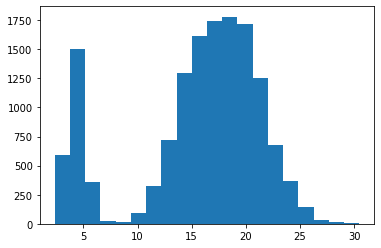

In [125]:
plt.hist(hrrp_df['predicted_readmission_rate'],bins=20);

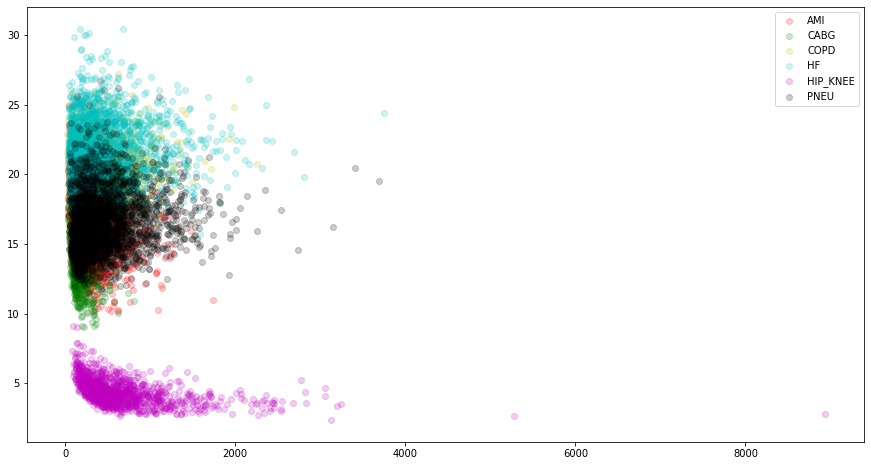

In [126]:
# Investigate distribution of readmission scores

hrrp_a = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_AMI_HRRP']
hrrp_b = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_CABG_HRRP']
hrrp_c = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_COPD_HRRP']
hrrp_d = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_HF_HRRP']
hrrp_e = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_HIP_KNEE_HRRP']
hrrp_f = hrrp_df.loc[hrrp_df['measure_name'] == 'READM_30_PN_HRRP']

plt.figure(figsize=(15,8))
plt.scatter(hrrp_a['number_of_discharges'],hrrp_a['predicted_readmission_rate'],alpha=0.2,color='r');
plt.scatter(hrrp_b['number_of_discharges'],hrrp_b['predicted_readmission_rate'],alpha=0.2,color='g');
plt.scatter(hrrp_c['number_of_discharges'],hrrp_c['predicted_readmission_rate'],alpha=0.2,color='y');
plt.scatter(hrrp_d['number_of_discharges'],hrrp_d['predicted_readmission_rate'],alpha=0.2,color='c');
plt.scatter(hrrp_e['number_of_discharges'],hrrp_e['predicted_readmission_rate'],alpha=0.2,color='m');
plt.scatter(hrrp_f['number_of_discharges'],hrrp_f['predicted_readmission_rate'],alpha=0.2,color='black');
plt.legend(('AMI','CABG','COPD','HF','HIP_KNEE','PNEU'));
#there is large difference in rates by readmission type

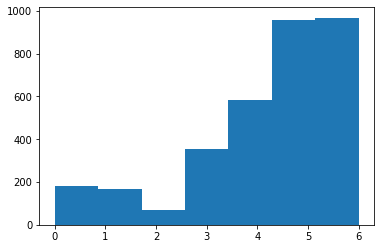

In [127]:
#check distribution of NaNs in readmission rate variable
hrrp_1 = hrrp_df.groupby(['provider_id']).count().sort_values(by='predicted_readmission_rate')
hrrp_1.shape
plt.hist(hrrp_1['predicted_readmission_rate'],bins=7);
# test = hrrp_1.loc[hrrp_1['excess_readmission_ratio'] == 6]
# test.shape

In [128]:
# check = hrrp_df.loc[(hrrp_df['number_of_discharges'].isna()) & (hrrp_df['excess_readmission_ratio'].isna() == False)]
# check['measure_name'].value_counts()

In [129]:
check2 = hrrp_df.loc[(hrrp_df['predicted_readmission_rate'].isna())]
x = check2['measure_name'].value_counts()
print(x, sum(x))

READM_30_CABG_HRRP        2270
READM_30_AMI_HRRP         1192
READM_30_HIP_KNEE_HRRP     794
READM_30_COPD_HRRP         410
READM_30_HF_HRRP           397
READM_30_PN_HRRP           331
Name: measure_name, dtype: int64 5394


In [130]:
# check3 = hrrp_df.loc[(hrrp_df['number_of_discharges'].isna()==False) & (hrrp_df['predicted_readmission_rate'].isna() == False)]
# check3['measure_name'].value_counts()

In [131]:
#replace missing predicted readmission rate values with the mean
avgs = hrrp_df.dropna(subset=['predicted_readmission_rate'])
avgs1 = avgs.groupby('measure_name',as_index=False)[['predicted_readmission_rate']].mean()
avgs1

,measure_name,predicted_readmission_rate
0,READM_30_AMI_HRRP,16.136304
1,READM_30_CABG_HRRP,13.209896
2,READM_30_COPD_HRRP,19.122233
3,READM_30_HF_HRRP,21.197227
4,READM_30_HIP_KNEE_HRRP,4.380488
5,READM_30_PN_HRRP,16.346139


In [132]:
# check distribution of number of discharges variable
check4 = hrrp_df.loc[(hrrp_df['number_of_discharges'].isna())]
x = check4['measure_name'].value_counts()
print(x, sum(x))

READM_30_CABG_HRRP        2672
READM_30_HIP_KNEE_HRRP    1940
READM_30_AMI_HRRP         1567
READM_30_COPD_HRRP         719
READM_30_HF_HRRP           602
READM_30_PN_HRRP           519
Name: measure_name, dtype: int64 8019


In [133]:
#replace missing number of discharges values with the mean
avgs_a = hrrp_df.dropna(subset=['number_of_discharges'])
avgs_a1 = avgs_a.groupby('measure_name',as_index=False)[['number_of_discharges']].mean()
avgs_a1

,measure_name,number_of_discharges
0,READM_30_AMI_HRRP,268.786799
1,READM_30_CABG_HRRP,176.052718
2,READM_30_COPD_HRRP,302.675391
3,READM_30_HF_HRRP,411.726560
4,READM_30_HIP_KNEE_HRRP,617.277819
5,READM_30_PN_HRRP,456.985145


In [134]:
#update predicted_readmission_rate and number_of_discharges NaNs with means

hrrp_df1 = pd.merge(hrrp_df,avgs1,on='measure_name')
hrrp_df1 = pd.merge(hrrp_df1,avgs_a1, on='measure_name')

def impute_prr(x):
    if np.isnan(x['predicted_readmission_rate_x']):
        return x['predicted_readmission_rate_y']
    else:
        return x['predicted_readmission_rate_x']

def impute_prr_count(x):
    if np.isnan(x['predicted_readmission_rate_x']):
        return 1
    else:
        return 0
    
def impute_nod(x):
    if np.isnan(x['number_of_discharges_x']):
        return x['number_of_discharges_y']
    else:
        return x['number_of_discharges_x'] 

def impute_nod_count(x):
    if np.isnan(x['number_of_discharges_x']):
        return 1
    else:
        return 0
    
hrrp_df1['predicted_readmission_rate'], hrrp_df1['PRR_imputed'] = hrrp_df1.apply(impute_prr,axis=1), hrrp_df1.apply(impute_prr_count,axis=1)
hrrp_df1['number_of_discharges'], hrrp_df1['nod_imputed'] = hrrp_df1.apply(impute_nod,axis=1), hrrp_df1.apply(impute_nod_count,axis=1)
hrrp_df1.drop(['predicted_readmission_rate_x','predicted_readmission_rate_y','number_of_discharges_x','number_of_discharges_y'],axis=1,inplace=True)
hrrp_df1.shape
# hrrp_df1.iloc[10000:10005,:]

(19674, 14)

In [135]:
hrrp_df1.loc[hrrp_df1['provider_id']=='390168']

,hospital_name,provider_id,state,measure_name,excess_readmission_ratio,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,predicted_readmission_rate,PRR_imputed,number_of_discharges,nod_imputed
2475,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_AMI_HRRP,0.9612,15.7355,26.0,07/01/2014,06/30/2017,NaN,15.1245,0,188.000000,0
5754,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_CABG_HRRP,0.8876,14.0207,NaN,07/01/2014,06/30/2017,5 - Results are not available for this reporti...,12.4451,0,176.052718,1
9033,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_COPD_HRRP,0.9566,18.1148,34.0,07/01/2014,06/30/2017,NaN,17.3279,0,215.000000,0
12312,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_HF_HRRP,0.8478,19.8879,35.0,07/01/2014,06/30/2017,NaN,16.8601,0,268.000000,0
15591,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_HIP_KNEE_HRRP,0.7768,4.0852,NaN,07/01/2014,06/30/2017,5 - Results are not available for this reporti...,3.1733,0,617.277819,1
18870,BUTLER MEMORIAL HOSPITAL,390168,PA,READM_30_PN_HRRP,0.8262,17.4809,32.0,07/01/2014,06/30/2017,NaN,14.4433,0,300.000000,0


In [136]:
# Only keep pneumonia measures for analysis
hrrp_df1a = hrrp_df1.loc[hrrp_df1['measure_name'] == 'READM_30_PN_HRRP']
hrrp_2 = hrrp_df1a.dropna(subset = ['number_of_discharges','predicted_readmission_rate'])
hrrp_2.shape
# hrrp_df1a.shape

(3279, 14)

In [137]:
hrrp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 16395 to 19673
Data columns (total 14 columns):
hospital_name                 3279 non-null object
provider_id                   3279 non-null object
state                         3279 non-null object
measure_name                  3279 non-null object
excess_readmission_ratio      2948 non-null float64
expected_readmission_rate     2948 non-null float64
number_of_readmissions        2748 non-null float64
start_date                    3279 non-null object
end_date                      3279 non-null object
footnote                      534 non-null object
predicted_readmission_rate    3279 non-null float64
PRR_imputed                   3279 non-null int64
number_of_discharges          3279 non-null float64
nod_imputed                   3279 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 384.3+ KB


In [138]:
#apply calcs individually and merge
hrrp_2_1 = hrrp_2.groupby(['provider_id'])[['number_of_discharges','number_of_readmissions']].sum()
# hrrp_2_1['raw_avg_readmitrate'] = hrrp_2_1['number_of_readmissions']/hrrp_2_1['number_of_discharges']
hrrp_2_2 = hrrp_2.groupby(['provider_id'],as_index=False)[['measure_name']].count().reset_index()
hrrp_2_2.drop(['index'],axis=1, inplace=True)

#non-weighted averages
hrrp_3a = hrrp_2.groupby(['provider_id','start_date','end_date'], as_index=False)[['excess_readmission_ratio']].mean().reset_index()
hrrp_3b = hrrp_2.groupby(['provider_id','start_date','end_date'], as_index=False)[['predicted_readmission_rate']].mean().reset_index()
hrrp_3c = hrrp_2.groupby(['provider_id','start_date','end_date'], as_index=False)[['expected_readmission_rate']].mean().reset_index()
hrrp_3d = hrrp_2.groupby(['provider_id','start_date','end_date'], as_index=False)[['PRR_imputed','nod_imputed']].sum().reset_index()

hrrp_3a.drop(['index'],axis=1, inplace=True)
hrrp_3b.drop(['start_date','end_date','index'],axis=1, inplace=True)
hrrp_3c.drop(['start_date','end_date','index'],axis=1, inplace=True)
hrrp_3d.drop(['start_date','end_date','index'],axis=1, inplace=True)

hrrp_3a.rename({'excess_readmission_ratio':'avg_EXCESS'},axis=1,inplace=True)
hrrp_3b.rename({'predicted_readmission_rate':'avg_PRR'},axis=1,inplace=True)
hrrp_3c.rename({'expected_readmission_rate':'avg_ERR'},axis=1,inplace=True)

hrrp_3 = pd.merge(hrrp_3a,hrrp_3b,on='provider_id')
hrrp_3 = pd.merge(hrrp_3,hrrp_3c,on='provider_id')
hrrp_3 = pd.merge(hrrp_3,hrrp_3d,on='provider_id')
hrrp_3 = pd.merge(hrrp_3,hrrp_2_1,on='provider_id')
hrrp_3 = pd.merge(hrrp_3,hrrp_2_2,on='provider_id')


In [139]:
hrrp_3.info()
hrrp_3.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3279 entries, 0 to 3278
Data columns (total 11 columns):
provider_id               3279 non-null object
start_date                3279 non-null object
end_date                  3279 non-null object
avg_EXCESS                2948 non-null float64
avg_PRR                   3279 non-null float64
avg_ERR                   2948 non-null float64
PRR_imputed               3279 non-null int64
nod_imputed               3279 non-null int64
number_of_discharges      3279 non-null float64
number_of_readmissions    3279 non-null float64
measure_name              3279 non-null int64
dtypes: float64(5), int64(3), object(3)
memory usage: 307.4+ KB


,provider_id,start_date,end_date,avg_EXCESS,avg_PRR,avg_ERR,PRR_imputed,nod_imputed,number_of_discharges,number_of_readmissions,measure_name
0,010001,07/01/2014,06/30/2017,1.0454,16.9464,16.2104,0,0,604.000000,105.0,1
1,010005,07/01/2014,06/30/2017,0.9677,15.1414,15.6471,0,0,759.000000,113.0,1
2,010006,07/01/2014,06/30/2017,0.9817,15.7014,15.9934,0,0,854.000000,133.0,1
3,010007,07/01/2014,06/30/2017,0.9891,13.8970,14.0497,0,0,206.000000,28.0,1
4,010008,07/01/2014,06/30/2017,0.9805,13.3243,13.5898,0,1,456.985145,0.0,1


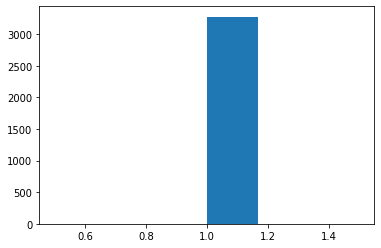

In [140]:
plt.hist(hrrp_3['measure_name'],bins=6);

In [141]:
hrrp_2.loc[hrrp_2['provider_id']=='010007']

,hospital_name,provider_id,state,measure_name,excess_readmission_ratio,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote,predicted_readmission_rate,PRR_imputed,number_of_discharges,nod_imputed
16398,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_PN_HRRP,0.9891,14.0497,28.0,07/01/2014,06/30/2017,NaN,13.897,0,206.0,0


In [142]:
hrrp_df.loc[hrrp_df['provider_id']=='010007']

,hospital_name,provider_id,state,measure_name,number_of_discharges,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,footnote
18,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_AMI_HRRP,NaN,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017,1 - The number of cases/patients is too few to...
19,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_CABG_HRRP,NaN,NaN,NaN,NaN,NaN,07/01/2014,06/30/2017,5 - Results are not available for this reporti...
20,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_COPD_HRRP,139.0,1.0096,17.4782,17.3113,25.0,07/01/2014,06/30/2017,NaN
21,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_HF_HRRP,82.0,1.1313,22.1229,19.5551,26.0,07/01/2014,06/30/2017,NaN
22,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_HIP_KNEE_HRRP,NaN,1.1117,5.5104,4.9569,NaN,07/01/2014,06/30/2017,5 - Results are not available for this reporti...
23,MIZELL MEMORIAL HOSPITAL,010007,AL,READM_30_PN_HRRP,206.0,0.9891,13.8970,14.0497,28.0,07/01/2014,06/30/2017,NaN


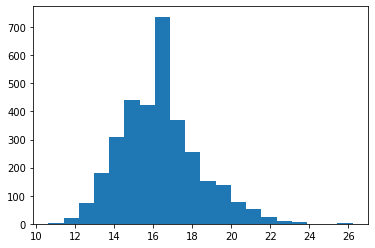

In [143]:
# plt.hist(hrrp_3['weighted_avg_PRR'],bins=20);
plt.hist(hrrp_3['avg_PRR'],bins=20);

### Wage Index data

In [144]:
def wf(file):
    new_file = file.loc[:,['CCN','Case_Mix_Indexes','FY_Wage_Index','3_Year_Avg_Hourly_Wage']]
    return new_file

wageindex14 = wf(wageindex14_df)
wageindex15 = wf(wageindex15_df)
wageindex16 = wf(wageindex16_df)
wageindex17 = wf(wageindex17_df)

wageindex17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587 entries, 0 to 3586
Data columns (total 4 columns):
CCN                       3587 non-null object
Case_Mix_Indexes          3409 non-null float64
FY_Wage_Index             3587 non-null float64
3_Year_Avg_Hourly_Wage    3480 non-null float64
dtypes: float64(3), object(1)
memory usage: 112.2+ KB


In [145]:
# convert to numbers and format CCNs for 6 digits, take average
def clean_wi(file):
    file['CCN'] = ["0"+x if len(x)==5 else x for x in file['CCN']]
    file.replace(['***','**','*',''], np.NaN, inplace=True)
    file['Case_Mix_Indexes'] = file['Case_Mix_Indexes'].astype(float)
    file['FY_Wage_Index'] = file['FY_Wage_Index'].astype(float)
    file['3_Year_Avg_Hourly_Wage'] = file['3_Year_Avg_Hourly_Wage'].astype(float)
    return file

wageindex14 = clean_wi(wageindex14)
wageindex15 = clean_wi(wageindex15)

def drop_nulls(file):
    file = file.dropna().reset_index().drop('index',axis=1)
    return file

wageindex14 = drop_nulls(wageindex14)
wageindex15 = drop_nulls(wageindex15)
wageindex16 = drop_nulls(wageindex16)
wageindex17 = drop_nulls(wageindex17)

In [146]:
#calculate means across available years - stack and calculate mean
wageindex = pd.concat([wageindex14,wageindex15,wageindex16,wageindex17]).sort_values('CCN')
wageindex.head(10)

,CCN,Case_Mix_Indexes,FY_Wage_Index,3_Year_Avg_Hourly_Wage
0,010001,1.7394,0.8106,27.9695
0,010001,1.6935,0.6941,28.6629
0,010001,1.7647,0.7704,28.3100
0,010001,1.6667,0.7666,29.0321
1,010005,1.3210,0.8274,28.0762
1,010005,1.3291,0.8150,27.2443
1,010005,1.3504,0.8099,28.1724
1,010005,1.3589,0.8212,27.7003
2,010006,1.6484,0.6857,27.2113
2,010006,1.6217,0.6875,27.4785


In [147]:
wageindex = wageindex.groupby(wageindex['CCN'], as_index=False).mean()
wageindex.head(5)

,CCN,Case_Mix_Indexes,FY_Wage_Index,3_Year_Avg_Hourly_Wage
0,010001,1.716075,0.760425,28.493625
1,010005,1.339850,0.818375,27.798300
2,010006,1.625075,0.712325,27.706850
3,010007,1.024550,0.692500,22.941875
4,010008,0.943050,0.702925,25.199350


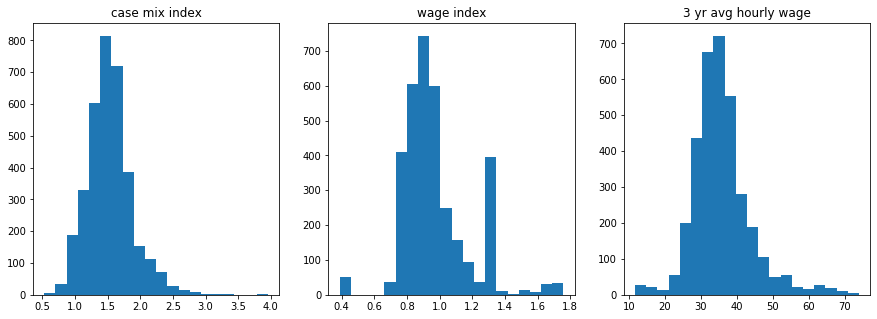

In [148]:
# plt.hist(wageindex['Case_Mix_Indexes'],bins=20);
# plt.hist(wageindex['FY_2017_Wage_Index'],bins=20);
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.hist(wageindex['Case_Mix_Indexes'],bins=20)
ax1.set_title('case mix index')
ax2.hist(wageindex['FY_Wage_Index'],bins=20)
ax2.set_title('wage index')
ax3.hist(wageindex['3_Year_Avg_Hourly_Wage'],bins=20)
ax3.set_title('3 yr avg hourly wage');

### Census Income data

In [149]:
def clean_ci(censusincome_df):
    #create county_state column for joining to hospital data
    censusincome_df['state'] = [x[x.find(",")+2:] for x in censusincome_df['Geographic Area Name']]
    censusincome_df['county_pre'] = [x[:x.find(",")].upper() for x in censusincome_df['Geographic Area Name']]
    #remove the words "COUNTY" or "PARISH" in the county name
    censusincome_df['county'] = [x[:x.find(" COUNTY")] if 'COUNTY' in x
                                 else x[:x.find(" PARISH")] if 'PARISH' in x
                                 else "THE DISTRICT" if x=='DISTRICT OF COLUMBIA'
                                 else x 
                                 for x in censusincome_df['county_pre']]
    censusincome_df['state_abbr'] = censusincome_df['state'].map(us_state_abbrev)
    # sum(censusincome_df['state_abbr'].isna())
    censusincome_df['county_st'] = censusincome_df['county']+"_"+censusincome_df['state_abbr']
    censusincome_df['county_st'].value_counts()

    #keep only the median household income column
    censusincome = censusincome_df.loc[:,['county_st','Households!!Estimate!!Median income (dollars)']]
    censusincome.rename(columns = {'Households!!Estimate!!Median income (dollars)':'median_household_income'}, inplace = True)

    return censusincome

censusincome14 = clean_ci(censusincome14_df)
censusincome15 = clean_ci(censusincome15_df)
censusincome16 = clean_ci(censusincome16_df)
censusincome17 = clean_ci(censusincome17_df)

In [150]:
# calculate mean median household income - stack and calculate
censusincome = pd.concat([censusincome14,censusincome15,censusincome16,censusincome17]).sort_values('county_st')
censusincome.head(10)

censusincome_check = censusincome['county_st'].value_counts()
# censusincome_check.describe()

In [151]:
censusincome = censusincome.groupby(censusincome['county_st'],as_index=False).mean()
censusincome.head(5)

,county_st,median_household_income
0,ABBEVILLE_SC,34652.0
1,ACADIA_LA,39837.0
2,ACCOMACK_VA,38503.0
3,ADAIR_IA,48765.0
4,ADAIR_KY,33873.0


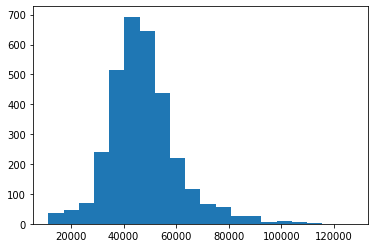

In [152]:
plt.hist(censusincome['median_household_income'],bins=20);

### Education level

In [153]:
# education_df.head(5)
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 48 columns):
FIPS Code                                                                   3204 non-null float64
State                                                                       3204 non-null object
Area name                                                                   3204 non-null object
2003 Rural-urban Continuum Code                                             3143 non-null float64
2003 Urban Influence Code                                                   3143 non-null float64
2013 Rural-urban Continuum Code                                             3143 non-null float64
2013 Urban Influence Code                                                   3143 non-null float64
Less than a high school diploma, 1970                                       3186 non-null object
High school diploma only, 1970                                              3186 non-null object
Some college (1

In [154]:
education_df = education_df.dropna(subset = ['Area name'])
education_df.shape

(3204, 48)

In [155]:
def clean_edu(education_df):
    #create county_state column for joining to hospital data
#     education_df['area_name'] = [x for x in education_df['Area name']]
    education_df['county_pre'] = [x.upper() for x in education_df['Area name']]
    #remove the words "COUNTY" or "PARISH" in the county name
    education_df['county'] = [x[:x.find(" COUNTY")] if 'COUNTY' in x
                                 else x[:x.find(" PARISH")] if 'PARISH' in x
                                 else "THE DISTRICT" if x=='DISTRICT OF COLUMBIA'
                                 else x 
                                 for x in education_df['county_pre']]
    education_df['county_st'] = education_df['county']+"_"+education_df['State']
    #create education variable
    education_df['some_college_or_higher'] = education_df["Percent of adults completing some college or associate's degree, 2013-17"]+education_df["Percent of adults with a bachelor's degree or higher, 2013-17"]
    #keep only the median household income column
    education = education_df.loc[:,['county_st','some_college_or_higher']]
    education = education.dropna(subset = ['some_college_or_higher'])
#     education.rename(columns = {'Households!!Estimate!!Median income (dollars)':'median_household_income'}, inplace = True)

    return education

education = clean_edu(education_df)

In [156]:
education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3194 entries, 0 to 3203
Data columns (total 2 columns):
county_st                 3194 non-null object
some_college_or_higher    3194 non-null float64
dtypes: float64(1), object(1)
memory usage: 74.9+ KB


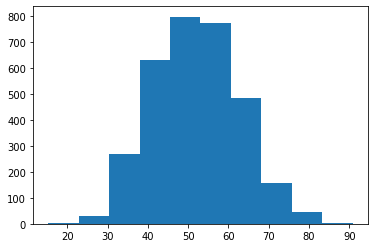

In [157]:
plt.hist(education['some_college_or_higher'],bins=10);

## 3. Join data

In [158]:
#join readmit info to general hospital info

hosp = pd.merge(hrrp_3,geninfo,on='provider_id')
hosp = pd.merge(hosp,wageindex,left_on='provider_id',right_on='CCN').drop('CCN',axis=1)
hosp = pd.merge(hosp,censusincome,on='county_st') # use how='left' if you want to check which ones dropped
hosp = pd.merge(hosp,education,on='county_st') # use how='left' if you want to check which ones dropped

# for checking
hosp1 = hosp.copy()

hosp.info()
hosp.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 31 columns):
provider_id                                             3113 non-null object
start_date                                              3113 non-null object
end_date                                                3113 non-null object
avg_EXCESS                                              2857 non-null float64
avg_PRR                                                 3113 non-null float64
avg_ERR                                                 2857 non-null float64
PRR_imputed                                             3113 non-null int64
nod_imputed                                             3113 non-null int64
number_of_discharges                                    3113 non-null float64
number_of_readmissions                                  3113 non-null float64
measure_name                                            3113 non-null int64
hospital_name                               

,provider_id,start_date,end_date,avg_EXCESS,avg_PRR,avg_ERR,PRR_imputed,nod_imputed,number_of_discharges,number_of_readmissions,...,patient_experience_national_comparison,effectiveness_of_care_national_comparison,timeliness_of_care_national_comparison,efficient_use_of_medical_imaging_national_comparison,county_st,Case_Mix_Indexes,FY_Wage_Index,3_Year_Avg_Hourly_Wage,median_household_income,some_college_or_higher
0,010001,07/01/2014,06/30/2017,1.0454,16.9464,16.2104,0,0,604.0,105.0,...,Below the national average,Same as the national average,Above the national average,Same as the national average,HOUSTON_AL,1.716075,0.760425,28.493625,42392.50,53.4
1,010055,07/01/2014,06/30/2017,0.9685,15.1511,15.6442,0,0,580.0,86.0,...,Same as the national average,Same as the national average,Above the national average,Above the national average,HOUSTON_AL,1.647400,0.754950,28.620800,42392.50,53.4
2,010005,07/01/2014,06/30/2017,0.9677,15.1414,15.6471,0,0,759.0,113.0,...,Same as the national average,Above the national average,Above the national average,Below the national average,MARSHALL_AL,1.339850,0.818375,27.798300,38819.50,48.7
3,010006,07/01/2014,06/30/2017,0.9817,15.7014,15.9934,0,0,854.0,133.0,...,Below the national average,Same as the national average,Above the national average,Below the national average,LAUDERDALE_AL,1.625075,0.712325,27.706850,42973.75,50.6
4,010007,07/01/2014,06/30/2017,0.9891,13.8970,14.0497,0,0,206.0,28.0,...,Below the national average,Below the national average,Above the national average,Not Available,COVINGTON_AL,1.024550,0.692500,22.941875,37313.00,46.5


In [159]:
## CHECKING
# check = hosp.loc[hosp['median_household_income'].isna()]
# check['county_st'].value_counts()
# # check.head(5)

# fragment='DISTRICT'

# # censusincome[censusincome['county_st'].str.contains(fragment)]
# censusincome_df[censusincome_df['county'].str.contains(fragment)]

# hosp[hosp['county_st'].str.contains(fragment)]

# geninfo_df[geninfo['state'].str.contains(fragment)]

## 4. Final cleaning and creation of dummy variables

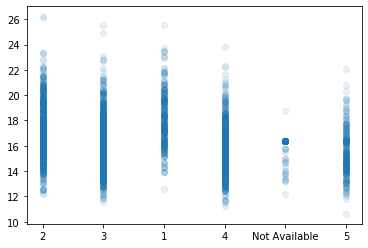

In [160]:
plt.scatter(hosp1['hospital_overall_rating'],hosp1['avg_PRR'],alpha=0.1);

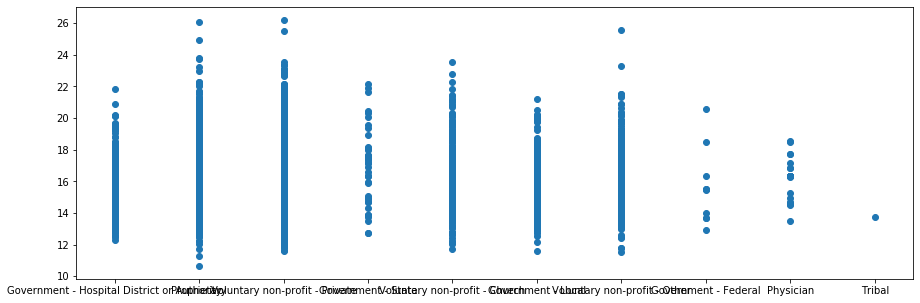

In [161]:
plt.figure(figsize=(15,5))
plt.scatter(hosp1['hospital_ownership'],hosp1['avg_PRR']);

In [162]:
#transpose data
# boxa = hosp1.dropna(subset=['hospital_ownership'])
# box = boxa.loc[:,['hospital_ownership','avg_PRR']]
# box.T
# ho_values = ['']

# for value in ho_values:
    

In [163]:
# data = [data, d2, d2[::2,0]]
# fig7, ax7 = plt.subplots()
# ax7.set_title('Multiple Samples with Different sizes')
# ax7.boxplot(data)

# plt.show()

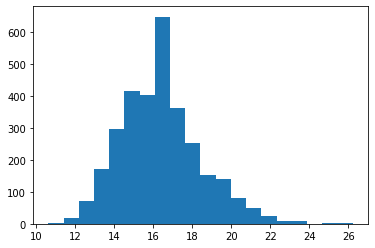

In [164]:
plt.hist(hosp['avg_PRR'],bins=20);
#remove left tails

In [165]:
hosp['hospital_ownership'].value_counts()

Voluntary non-profit - Private                 1375
Proprietary                                     640
Voluntary non-profit - Other                    310
Government - Hospital District or Authority     250
Voluntary non-profit - Church                   248
Government - Local                              168
Physician                                        70
Government - State                               41
Government - Federal                             10
Tribal                                            1
Name: hospital_ownership, dtype: int64

In [166]:
hosp['hospital_type'].value_counts()
#do not need to inclue hospital_type as categorical variable - only acute care hospitals in the final dataset

Acute Care Hospitals    3113
Name: hospital_type, dtype: int64

In [167]:
hosp['emergency_services'].value_counts()

True     2867
False     246
Name: emergency_services, dtype: int64

In [168]:
hosp['hospital_overall_rating'].value_counts()
#leave for now, may drop the N/As if it's not a useful predictor

3                946
4                737
2                705
1                277
5                262
Not Available    186
Name: hospital_overall_rating, dtype: int64

In [169]:
hosp['mortality_national_comparison'].value_counts()
#leave for now, may drop the N/As if it's not a useful predictor

Same as the national average    2041
Above the national average       385
Not Available                    350
Below the national average       337
Name: mortality_national_comparison, dtype: int64

In [170]:
def hosp_cat(x):
    if x == 'Voluntary non-profit - Private':
        return 'Private Non-profit'
    elif x[0:9] == 'Voluntary':
        return 'Non-profit Other'
    elif x[0:10] == 'Government':
        return 'Government'
    elif x == 'Proprietary':
        return 'Proprietary'
    elif x == 'Physician' or x == 'Tribal':
        return 'Other'

In [171]:
# drop low PRRs to avoid left tail
#hosp = hosp.loc[hosp['weighted_avg_PRR'] >=5]

# drop all hospitals
hosp = hosp.loc[hosp['PRR_imputed'] == 0]
# only keep hospitals where 3 or fewer PRRs are imputed
# hosp = hosp.loc[hosp['PRR_imputed'] <= 3]

hosp = hosp.loc[hosp['3_Year_Avg_Hourly_Wage'].isna()==False]
hosp = hosp.loc[hosp['hospital_overall_rating'] != 'Not Available']
hosp = hosp.loc[hosp['mortality_national_comparison'] != 'Not Available']

#

#group hospital ownership types
hosp['hospital_ownership'] = hosp['hospital_ownership'].apply(hosp_cat)

#reduces observations by several hundred- consider not keeping
hosp = hosp.loc[hosp['safety_of_care_national_comparison'] != 'Not Available']
hosp = hosp.loc[hosp['patient_experience_national_comparison'] != 'Not Available']
hosp = hosp.loc[hosp['effectiveness_of_care_national_comparison'] != 'Not Available']
hosp = hosp.loc[hosp['timeliness_of_care_national_comparison'] != 'Not Available']
hosp = hosp.loc[hosp['efficient_use_of_medical_imaging_national_comparison'] != 'Not Available']

#Create categorical variables
# hosp['hospital_type'].value_counts()
hosp = pd.get_dummies(hosp, columns=['emergency_services','hospital_ownership','hospital_overall_rating',
                                     'mortality_national_comparison','safety_of_care_national_comparison',
                                     'patient_experience_national_comparison',
                                     'effectiveness_of_care_national_comparison',
                                     'timeliness_of_care_national_comparison',
                                     'efficient_use_of_medical_imaging_national_comparison'])

#replace spaces in column names with '_'
hosp.columns = hosp.columns.str.replace(' ', '_')
hosp.columns = hosp.columns.str.replace('-','')

#rename rating columns to be more interpretable
new_names = {'mortality_national_comparison_Below_the_national_average' : 'mortality_better_than_national_average',
'mortality_national_comparison_Same_as_the_national_average' : 'mortality_same_as_national_average',
'mortality_national_comparison_Above_the_national_average' : 'mortality_worse_than_national_average',
'safety_of_care_national_comparison_Below_the_national_average' : 'safety_of_care_better_than_national_average',
'safety_of_care_national_comparison_Same_as_the_national_average' : 'safety_of_care_same_as_national_average',
'safety_of_care_national_comparison_Above_the_national_average' : 'safety_of_care_worse_than_national_average',
'patient_experience_national_comparison_Below_the_national_average' : 'patient_experience_worse_than_national_average',
'patient_experience_national_comparison_Same_as_the_national_average' : 'patient_experience_same_as_national_average',
'patient_experience_national_comparison_Above_the_national_average' : 'patient_experience_better_than_national_average',
'effectiveness_of_care_national_comparison_Below_the_national_average' : 'effectiveness_of_care_worse_than_national_average',
'effectiveness_of_care_national_comparison_Same_as_the_national_average' : 'effectiveness_of_care_same_as_national_average',
'effectiveness_of_care_national_comparison_Above_the_national_average' : 'effectiveness_of_care_better_than_national_average',
'timeliness_of_care_national_comparison_Below_the_national_average' : 'timeliness_of_care_better_than_national_average',
'timeliness_of_care_national_comparison_Same_as_the_national_average' : 'timeliness_of_care_same_as_national_average',
'timeliness_of_care_national_comparison_Above_the_national_average' : 'timeliness_of_care_worse_than_national_average',
'efficient_use_of_medical_imaging_national_comparison_Below_the_national_average' : 'medical_imaging_better_than_national_average',
'efficient_use_of_medical_imaging_national_comparison_Same_as_the_national_average' : 'medical_imaging_same_as_national_average',
'efficient_use_of_medical_imaging_national_comparison_Above_the_national_average' : 'medical_imaging_worse_than_national_average'}
hosp.rename(columns=new_names,inplace=True)
#manually drop 
drop_cols = ['emergency_services_False','hospital_ownership_Government','hospital_overall_rating_1',
             'mortality_worse_than_national_average',
             'safety_of_care_worse_than_national_average',
             'patient_experience_worse_than_national_average',
             'effectiveness_of_care_worse_than_national_average',
             'timeliness_of_care_worse_than_national_average',
             'medical_imaging_worse_than_national_average']
hosp.drop(drop_cols,axis=1,inplace=True)
hosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 3112
Data columns (total 43 columns):
provider_id                                           2320 non-null object
start_date                                            2320 non-null object
end_date                                              2320 non-null object
avg_EXCESS                                            2320 non-null float64
avg_PRR                                               2320 non-null float64
avg_ERR                                               2320 non-null float64
PRR_imputed                                           2320 non-null int64
nod_imputed                                           2320 non-null int64
number_of_discharges                                  2320 non-null float64
number_of_readmissions                                2320 non-null float64
measure_name                                          2320 non-null int64
hospital_name                                         2320 non-nul

In [172]:
hosp['nod_imputed'].value_counts()

0    2279
1      41
Name: nod_imputed, dtype: int64

In [173]:
hosp['PRR_imputed'].value_counts()

0    2320
Name: PRR_imputed, dtype: int64

In [174]:
# hosp['hospital_ownership'].value_counts()

## 5. EDA with updated dataset

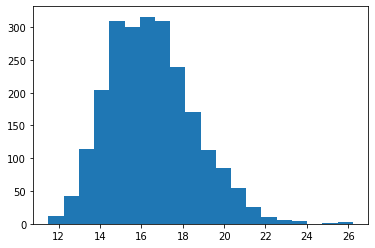

In [175]:
plt.hist(hosp['avg_PRR'],bins=20);

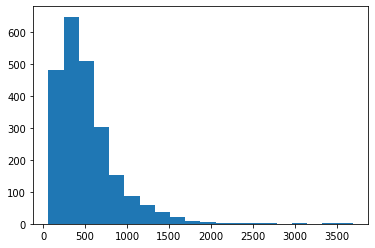

In [176]:
plt.hist(hosp['number_of_discharges'],bins=20);

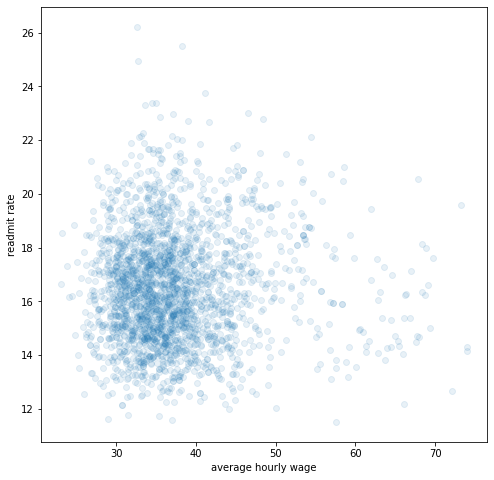

In [177]:
plt.figure(figsize=(8,8))
plt.scatter(hosp['3_Year_Avg_Hourly_Wage'],hosp['avg_PRR'],alpha=0.1)
plt.xlabel('average hourly wage')
plt.ylabel('readmit rate');

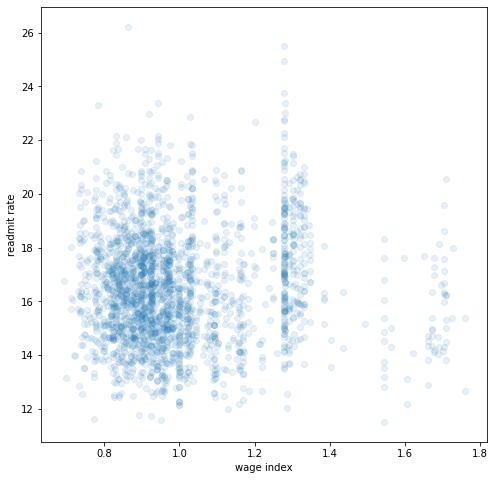

In [178]:
plt.figure(figsize=(8,8))
plt.scatter(hosp['FY_Wage_Index'],hosp['avg_PRR'],alpha=0.1)
plt.xlabel('wage index')
plt.ylabel('readmit rate');

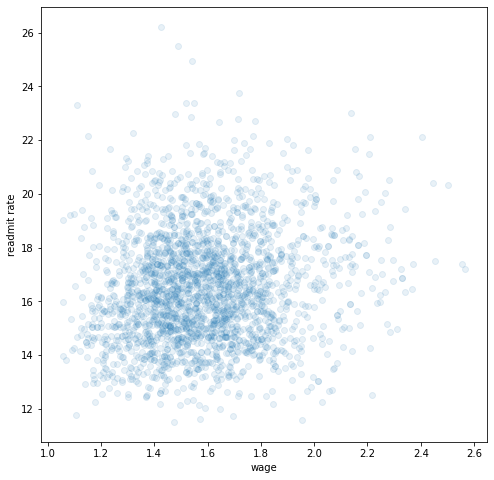

In [179]:
plt.figure(figsize=(8,8))
plt.scatter(hosp['Case_Mix_Indexes'],hosp['avg_PRR'],alpha=0.1)
plt.xlabel('wage')
plt.ylabel('readmit rate');

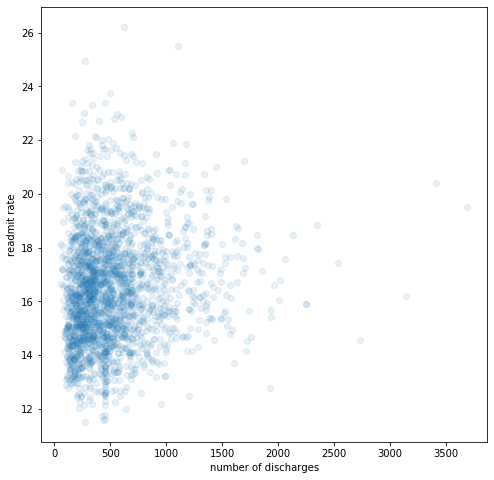

In [180]:
plt.figure(figsize=(8,8))
plt.scatter(hosp['number_of_discharges'],hosp['avg_PRR'],alpha=0.1)
plt.xlabel('number of discharges')
plt.ylabel('readmit rate');

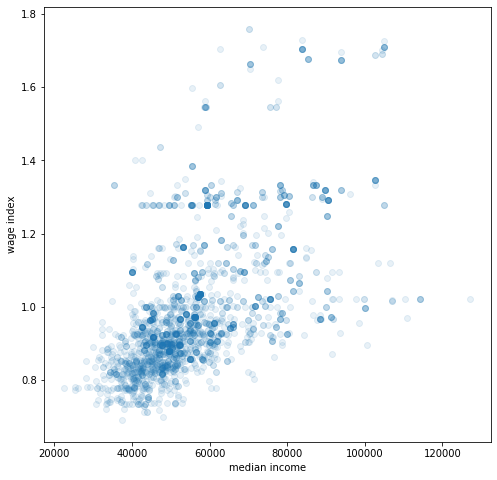

In [181]:
plt.figure(figsize=(8,8))
plt.scatter(hosp['median_household_income'],hosp['FY_Wage_Index'],alpha=0.1)
plt.xlabel('median income')
plt.ylabel('wage index');

In [182]:
with open('pickles/hosp.pickle', 'wb') as to_write:
    pickle.dump(hosp, to_write)